# PA 2.1: Classy City

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px" />
</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 2.1. Due: complete this PA prior to class on Friday, Nov 15, 2024.*

As a smart, young capable engineer with a wealth of Python skills, you have been recruited by a venture capital firm to make a huge financial profit by setting up a series of high quality food and beverage establishments in a brand new town in the Netherlands, Petaluma. The town will be home to a brand new Technical University and the location of the student houses has already been confirmed. In fact, they have been laid out in a triangular grid, each equal distance apart, in order to minimize the noise and disruption to the non-student citizens of Petaluma. The task at hand is to find the coordinates of the optimal locations of the food and beverage establishments so that the venture capital firm knows which buildings to purchase.

The conditions are:
- the coordinates of the student houses are known and are laid out as a grid of equilateral triangles
- the venture capital firm would like to start by looking at two types of establishments: bars and kapsalon shops
- as it is important to keep the bars close to as many student houses as possible
- as students get hungry after visiting the bars, it is important to keep the kapsalon shops close to as many bars as possible
- therefore, you can assume the optimal location of the bars and shops are on a grid that is equal distance from the student houses and bars, respectively
- the venture capital firm will want to reuse the analysis tool for investments in other cities around the world, so re-use of the code is essential

Fortunately, some Python code in `city.py` has already been written for you, and you only need to modify it to complete the analysis. The steps to complete this assignment are thus:

1. Familiarize yourself with the student houses and the provided class `Plan`.
2. Use the code to define "triangles" (regions between student houses).
3. Modify the methods in the class `Plan` to find the locations of the bars and kapsalon shops.

_Hint: before starting it may be useful to make a quick sketch by hand of where the three types of buildings are located in the X-Y plane. Note also that this will be very much analogous to the unstructured mesh that we will use to solve our modelling exercises in Week 2.1._

<div style="background-color:#FAE99E; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>NOTE:</b>

The cell below allows you to edit the contents of helper and incorporate the changes in the notebook without restarting the kernel.

Keep in mind, however, that error messages do not always display properly when using this feature; if you find that the Python traceback does not make sense while doing this assignment you should restart the kernal!
</p>
</div>

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt


## Part 1: Getting Started


First we will need to familiarize ourselves with the student houses and the provided class `Plan`.

**If you don't remember anything about Python classes remember to review the [book chapter from Week 1.7 on OOP](https://mude.citg.tudelft.nl/2024/book/external/learn-programming/book/python/oop/classes.html)**


<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.1:</b>   

First take a couple minutes to open the file <code>city.py</code> and <b>read</b> the contents. We will refer back to this file many times, so at this stage it is only necessary to look at the <code>__init__</code> method to see how the class can be instantiated, as well as scrolling through the file to get an overview for the (many!) and various types of methods that have been implemented.

Once you have read through the file, run the cell below to import the class.

</p>
</div>

In [2]:
from city_solution import *

If you read through the file closely, you will realize that we need two inputs to instantiate the class: `coordinates` and `side_length`. This is the way the location of the student houses are defined.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.2:</b>   

The cell below defines the coordinates of the student houses, all of which are spaced 2 units apart. Use this information to instantiate the class.

</p>
</div>

In [ ]:
coordinates = np.array(
              [[7.000, 1.000],
               [4.000, 2.732],
               [3.000, 1.000],
               [5.000, 1.000],
               [3.000, 4.464],
               [1.000, 4.464],
               [6.000, 2.732],
               [1.000, 1.000],
               [7.000, 4.464],
               [2.000, 2.732],
               [5.000, 4.464]])

# my_plan = Plan(YOUR_CODE_HERE, YOUR_CODE_HERE)

# SOLUTION
my_plan = Plan(coordinates, 2)

Great, now we are ready to plan our city! To get an idea for what the layout of the city looks like, a method has already been included in the class to help you visualize it.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.3:</b>   

Visualize the layout of student houses by using the method <code>plot_coordinates</code>.

</p>
</div>

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p>Note: throughout this entire assignment you will be expected to look through the contents of <code>city.py</code> and really <b>read</b> the contents in order to understand how to use the class <code>Plan</code>.</p></div>

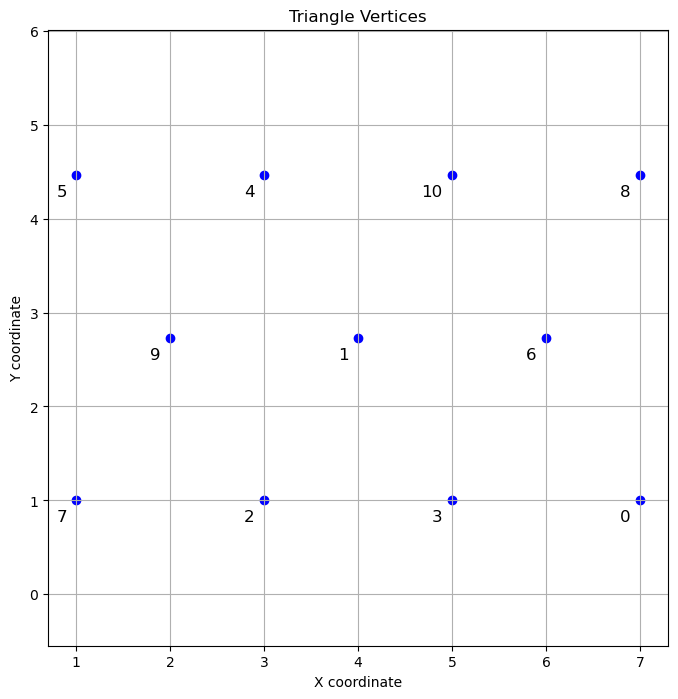

In [4]:
# YOUR_CODE_HERE

# SOLUTION
my_plan.plot_coordinates();

## Part 2: Use the code to define "triangles" (regions between student houses).

Now that we are familiar with the class and the student house locations, we can start preparing the analysis. The first step is to recognize that we need to have a way to define the relationship between the points geometrically, as an arbitrary collection of coordinates does not allow us to evaluate the problem in a structured way. We will do this by defining **triangles** to represent the area defined by every set of three student houses.

To define a triangle, we will use a Python list in the following form:

```
[[a, b, c],
 [a, b, c],
  ...
  [a, b, c]]
```

Where:
- the list contains N lists, and N is the total number of triangles (10, in our case)
- each list within the list defines a triangle
- `a`, `b` and `c` are integers that define the vertices of each triangle; they are the index of the row of each point in the array `coordinate` (defined above).

Our main goal in this part is to define all of the triangles that are implied by the layout of the student houses. Some methods are already included in the class to help you implement this correctly.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.1:</b>   

The code below is set up to illustrate how you can use the methods to try out various triangle specifications. Running the cell below will throw and assertion error because it begins with a poorly-defined triangle. Change the vertices of the triangle until you successfully define an equilateral triangle defined by 3 student houses.

<em>There will be some warnings and tips in the output to help with this entire output. For this task you only need to define one triangle.</em>

</p>
</div>

All triangles seem to be defined correctly!


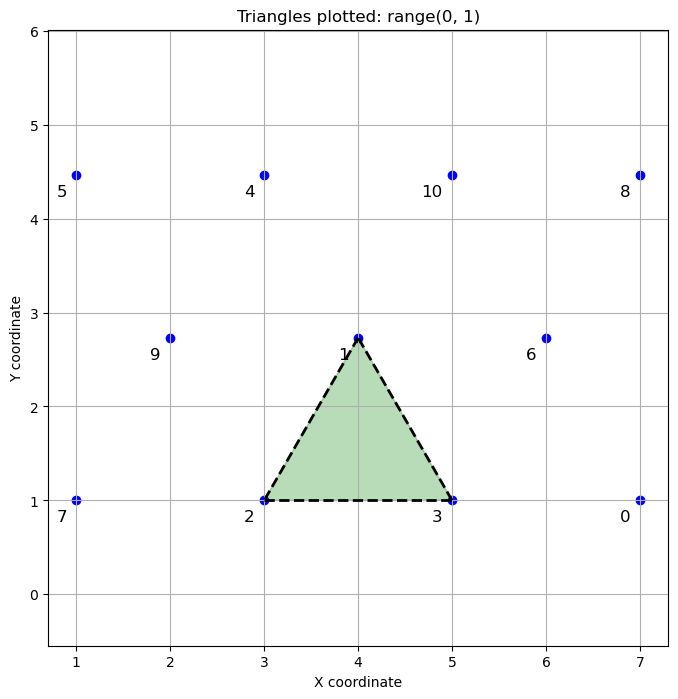

In [5]:
# my_plan.try_triangles([[0, 1, 2]])

# SOLUTION
my_plan.try_triangles([[1, 2, 3]])

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.2:</b>   

Now let's define all of the triangles! Once you have successfully defined all 10 triangles, you will no longer see any error messages and the plot will be filled with green areas between all of the coordinates.

</p>
</div>

All triangles seem to be defined correctly!


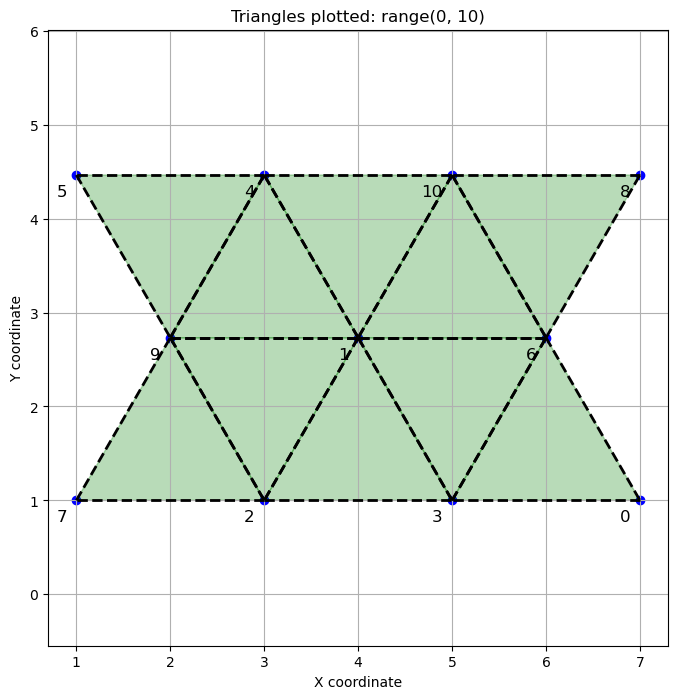

In [6]:
# all_triangles = [YOUR_CODE_HERE]
# my_plan.try_triangles(all_triangles)

# SOLUTION
all_triangles = [[0, 3, 6],
                 [1, 2, 3],
                 [1, 2, 9],
                 [1, 3, 6],
                 [1, 4, 9],
                 [1, 4, 10],
                 [1, 6, 10],
                 [2, 7, 9],
                 [4, 5, 9],
                 [6, 8, 10]]
my_plan.try_triangles(all_triangles)

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.3:</b>   

Once you have successfully defined all triangles above, you can add these as an attribute of the class: <code>triangles</code>. Once you read the code in <code>city.py</code> and identify the right attribute to define, the method <code>plot_triangles</code> will work successfully and should produce an identical plot to that in the previous task.

</p>
</div>

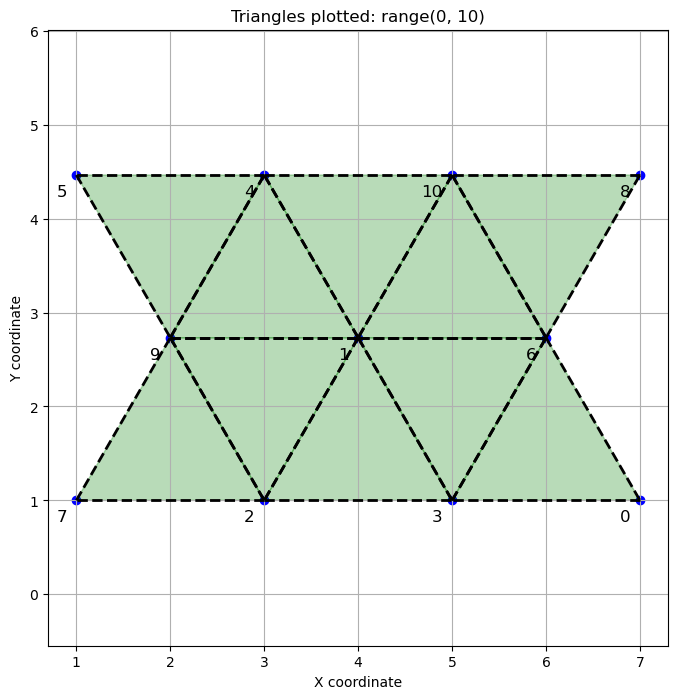

In [7]:
# YOUR_CODE_HERE
# my_plan.plot_triangles();

# SOLUTION
my_plan.triangles = all_triangles
my_plan.plot_triangles();

Great, now we have a way to look at the space between each group of student houses! This will be useful for finding the locations of each bar. 

Next, it is also going to be useful to have a way to look at the relationship between adjacent triangles...let's call them "shared sides." The class `Plan` has already been implemented with some features to look at the shared sides. However, first we need to define the syntax for specifying one, which we will do in (another) set of nested lists, as illustrated here:

```
[[[c1, c2], [t1, t2]],
 [[c1, c2], [t1, t2]],
   ...
 [[c1, c2], [t1, t2]]]
```

In this case we have a list of lists, where each item in the inner list contains _two_ lists. Whoa, complex! Let's break it down:

- each item in the outer list represents a single shared side between two triangles
- within the list for each shared side, there are two lists: the first identifies the two coordinates defining the side and the second identifies the two triangles that share that side
- `c1` and `c2` are integers specifying the index of the row in the attribute `coordinates`
- `t1` and `t2` are integers specifying the index of the row in the attribute `triangles` (what you defined in the previous task)
- the method `plot_shared_sides` can illustrate a shared side to help confirm you specify it properly

Let's see if you can specify a shared side!

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.4:</b>   

The code cell below defines a shared side and two adjacent triangles <em>incorrectly</em>. Fix it by changing the values of the coordinates and/or triangles!

<em>You can verify you have done it correctly if two adjacent green triangles are highlighted, along with the shared side being highlighted as a red dashed line.</em>

<em>Note: depending on the way in which you defined triangles above, there is a tiny chance the code cell below actually is correct for your case.</em>

</p>
</div>

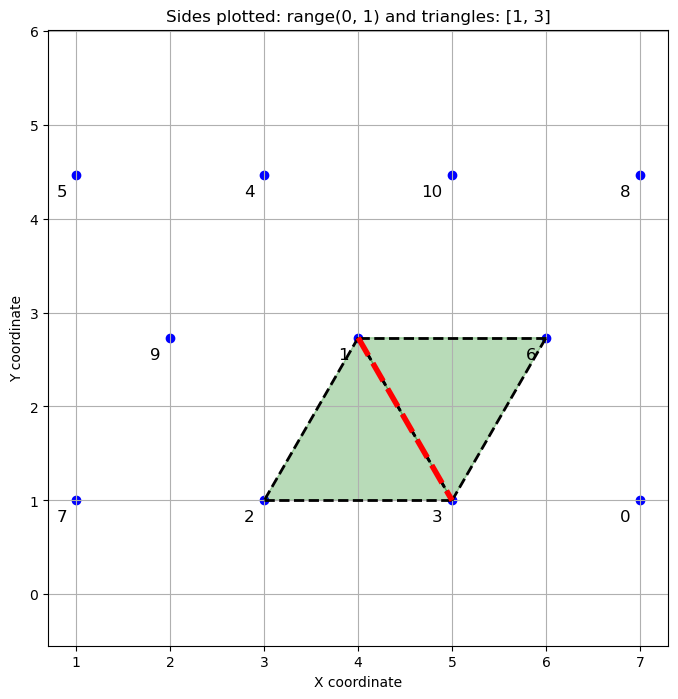

In [8]:
# my_plan.plot_shared_sides([[[9, 2], [3, 8]]]);

# SOLUTION (there are many possible answers)
my_plan.plot_shared_sides([[[1, 3], [3, 1]]]);

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.5:</b>   

Now let's define all of the shared sides! Once you have successfully done so, you will no longer see any error messages and the plot will be filled with green green triangles and red dashed shared sides.

</p>
</div>

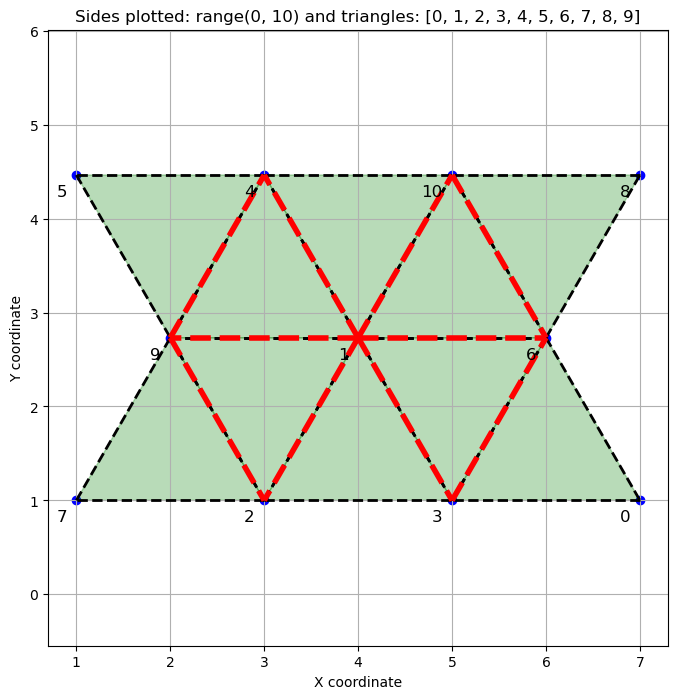

In [9]:
# sides = [YOUR_CODE_HERE] # remember to use format [[[a, b], [c, d]], ... ]
# my_plan.plot_shared_sides(sides);

# SOLUTION
sides = [[[3, 6], [0, 3]],
         [[1, 2], [1, 2]],
         [[1, 3], [1, 3]],
         [[1, 9], [2, 4]],
         [[9, 2], [2, 7]],
         [[1, 6], [3, 6]],
         [[1, 4], [4, 5]],
         [[9, 4], [4, 8]],
         [[1, 10], [5, 6]],
         [[10, 6], [6, 9]]]
my_plan.plot_shared_sides(sides);

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.6:</b>   

Once you have successfully defined all shared sides above, you can add these as an attribute of the class: <code>shared_sides</code>. If the plotting function succesfully runs without arguments (as written below), it confirms you did it correctly.

</p>
</div>

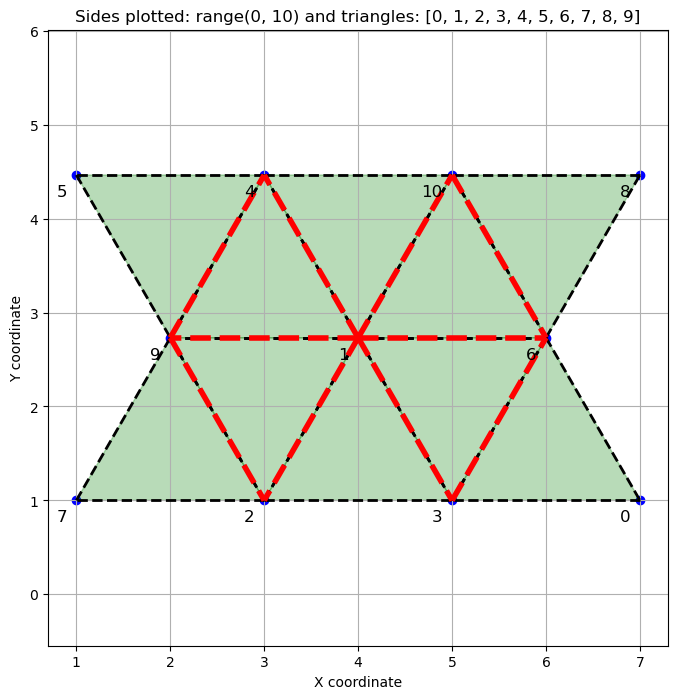

In [10]:
# YOUR_CODE_HERE
# my_plan.plot_shared_sides();

# SOLUTION
my_plan.shared_sides = sides
my_plan.plot_shared_sides();

## Part 3: Modify the Class `Plan`

Now that we are familiar with the class, we are ready to modify the methods in `Plan` to find the locations of the bars and kapsalon shops. This means you will have to edit the file `city.py`!

_If you are unsure of what to do in this part, remember that a lot of information was provided at the top of this notebook!_

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.1:</b>   

Complete the method <code>get_bar_coordinates</code> to find the optimal location of the bars. Note that there are many ways to do this; our suggestion is to first identify the key calculation that should be made and how it relates to each triangle. Then implementing the calculation can be accomplished with a simple loop.

You can check your work by executing the cell below, which will return errors and warnings until a plot with the correct points is produced.

</p>
</div>

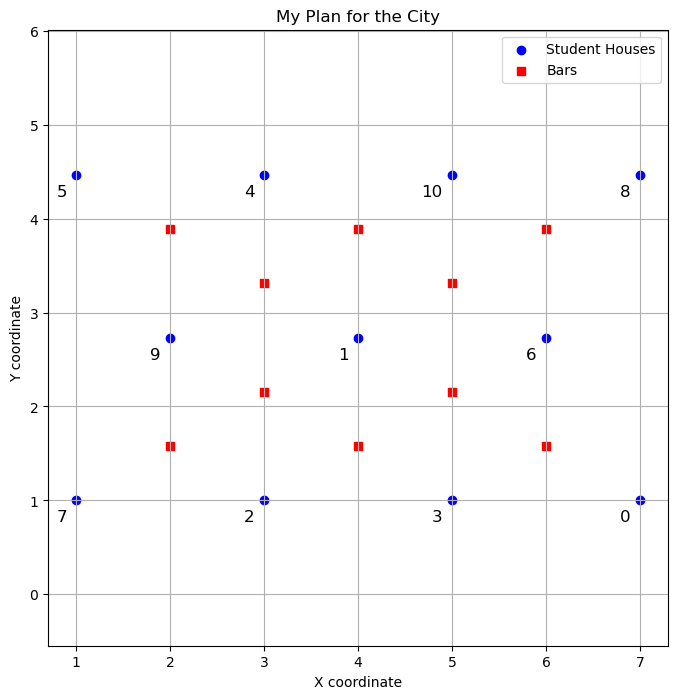

In [11]:
my_plan.get_bar_coordinates()
my_plan.plot_everything();

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.2:</b>   

Complete the method <code>get_kapsalon_coordinates</code> to find the optimal location of the kapsalon shops. As with the bars, there are many ways to do this; this time you should consider how to take advantage of the shared sides defined earlier.

You can check your work by executing the cell below, which will return errors and warnings until a plot with the correct points is produced.

</p>
</div>

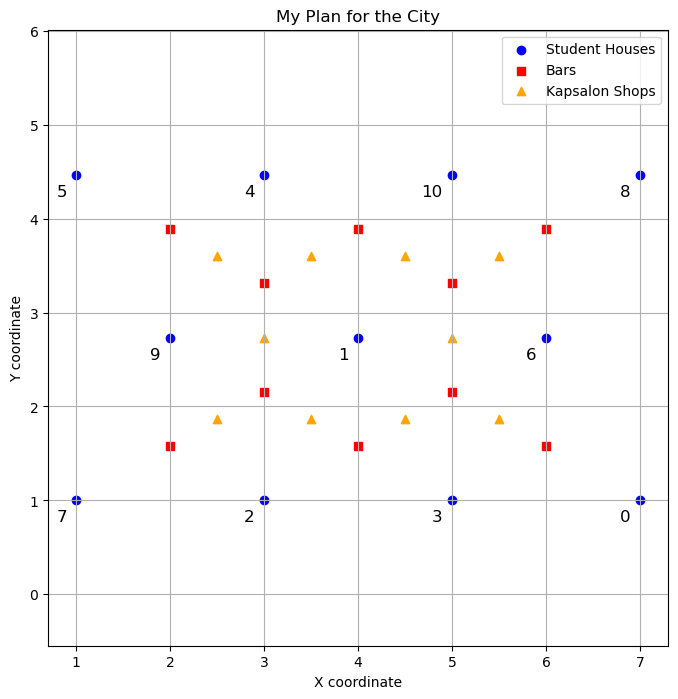

In [12]:
my_plan.get_kapsalon_coordinates()
my_plan.plot_everything();


**End of notebook.**
<h2 style="height: 60px">
</h2>
<h3 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; bottom: 60px; right: 50px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="border-width:; width:88px; height:auto; padding-top:10px" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    
</h3>
<span style="font-size: 75%">
&copy; Copyright 2024 <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE</a> TU Delft. This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0 License</a>.